# **SIMULATION ANALYISIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv('./visitor_journey.csv')

df = pd.read_csv("visitor_journey.csv")

# Calculate total time spent in the park by each visitor
df['visit_duration'] = df['time_left'] - df['time_of_entry']

# Preview
df.head()



,id,type,ticket_type,attraction,wait_at_attraction,ride_duration,satisfaction_status,fatigue,time,day,time_of_entry,time_left,entered_park,attractions_visited_so_far,visit_duration
0,V0009,child,online,Flying Chairs,0.0,4.0,100,0,6.60,Monday,1.19,121.19,True,1,120.00
1,V0022,child,online,Pirate Ship,0.0,4.7,100,0,7.01,Monday,1.51,402.23,True,1,400.72
2,V0024,adult,online,Swing Ride,0.0,4.2,100,0,7.06,Monday,2.02,310.44,True,1,308.42
3,V0020,adult,online,Fun House,0.0,4.5,100,0,7.32,Monday,1.70,168.17,True,1,166.47
4,V0035,child,online,Bumper Cars,0.0,3.5,100,0,7.85,Monday,3.10,203.09,True,1,199.99


## Correlation Matrix

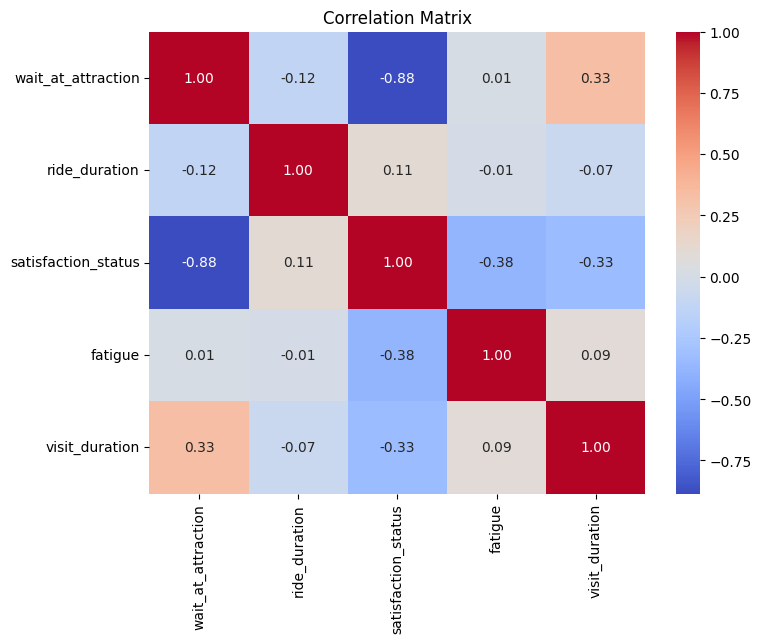

In [ ]:
# Select relevant numeric features
numeric_cols = ['wait_at_attraction', 'ride_duration', 'satisfaction_status', 'fatigue', 'visit_duration']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###  Correlation Analysis

The correlation matrix reveals several important relationships between visitor behavior metrics:

- **Wait Time vs Satisfaction (-0.88)**  
  There is a **strong negative correlation** between wait time at attractions and visitor satisfaction. This suggests that reducing wait times could significantly boost overall satisfaction.

- **Wait Time vs Visit Duration (0.33)**  
  A moderate positive correlation indicates that visitors who spend more time in the park may encounter longer waits—perhaps due to visiting more attractions or staying during peak hours.

- **Satisfaction vs Fatigue (-0.38)**  
  As expected, higher levels of fatigue are **moderately associated** with lower satisfaction, highlighting the impact of visitor comfort on their experience.

- **Satisfaction vs Visit Duration (-0.33)**  
  Interestingly, longer visits slightly reduce satisfaction on average, possibly due to cumulative fatigue or overexposure.

- **Ride Duration Correlations (weak)**  
  Ride duration shows **very weak** correlation with other variables, including satisfaction and fatigue, suggesting it's not a strong predictor of the visitor's experience on its own.

- **Fatigue vs Other Variables (weak)**  
  Fatigue appears weakly related to most other variables except for satisfaction, reinforcing that it’s a more subjective and complex factor.


## Distributions

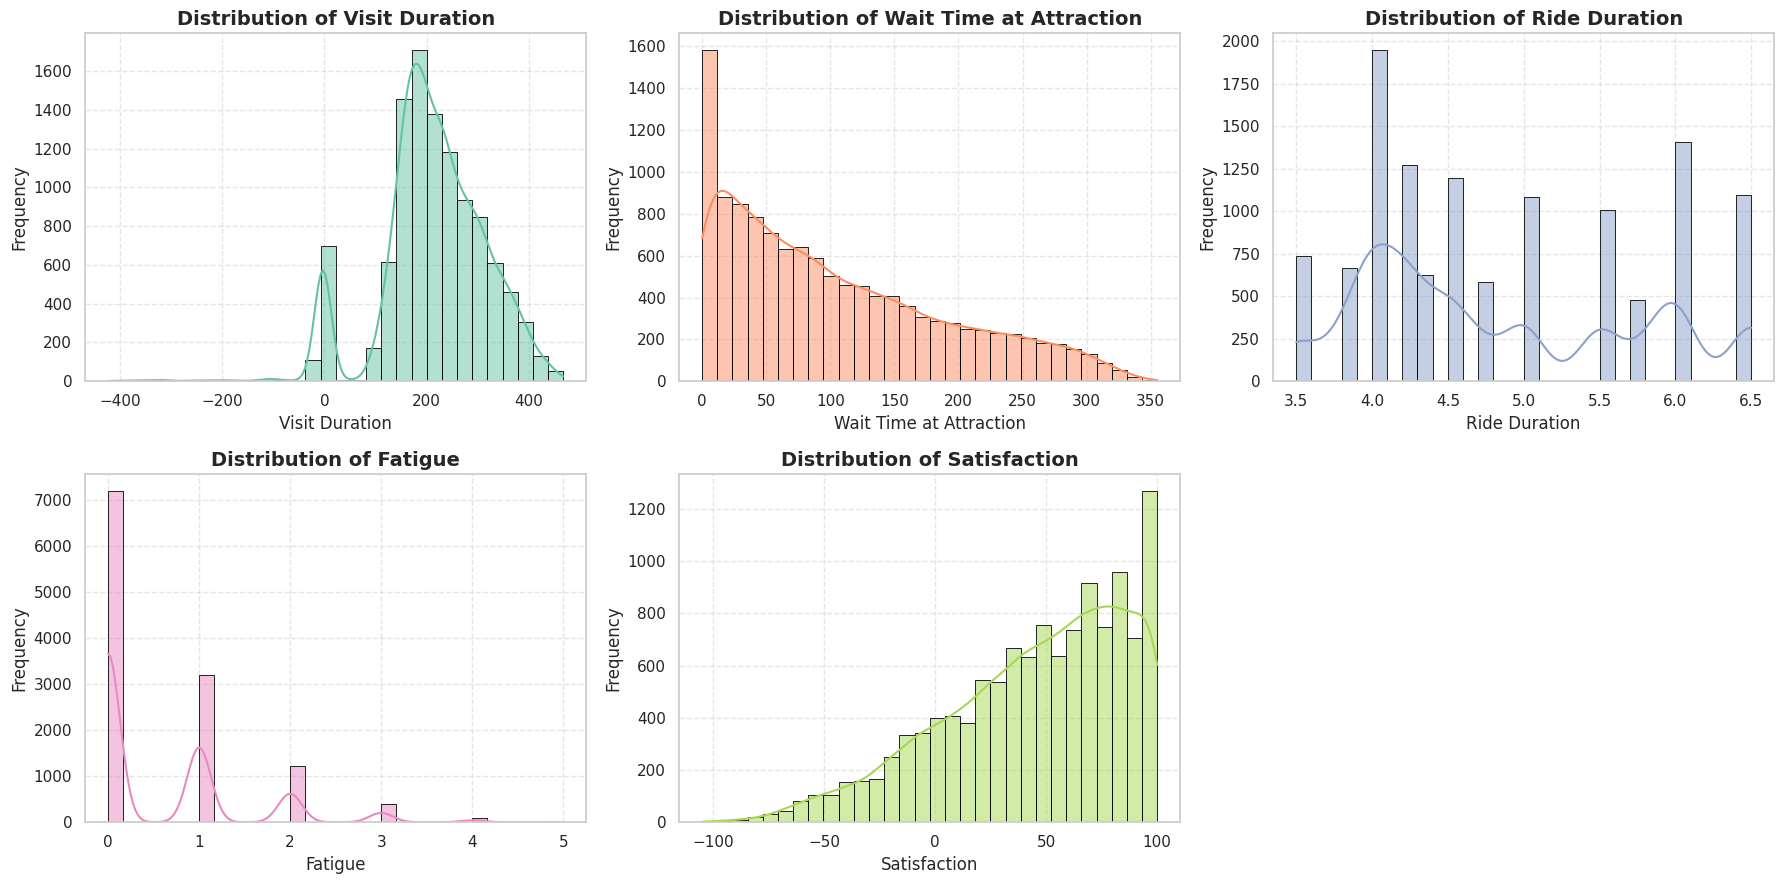

In [ ]:
# Apply consistent style
sns.set_theme(style="whitegrid")

# Define custom color palette
palette = sns.color_palette("Set2")

# Define metrics and their titles
metrics = ['visit_duration', 'wait_at_attraction', 'ride_duration', 'fatigue', 'satisfaction_status']
titles = ['Visit Duration', 'Wait Time at Attraction', 'Ride Duration', 'Fatigue', 'Satisfaction']

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes = axes.flatten()

# Plot each histogram with consistent styling
for i, metric in enumerate(metrics):
    sns.histplot(
        data=df,
        x=metric,
        kde=True,
        bins=30,
        ax=axes[i],
        color=palette[i % len(palette)],
        edgecolor='black',
        linewidth=0.6
    )
    axes[i].set_title(f"Distribution of {titles[i]}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(titles[i], fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove any unused subplot
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Final layout tweaks
plt.tight_layout()
plt.show()

##  Distribution Analysis

The following histograms provide insight into the behavior and experience of visitors in the theme park:

- **Visit Duration**:  
  The distribution is right-skewed, with the majority of visitors spending between 100 and 300 minutes in the park. There are a few outliers with extremely low or even negative values, which might indicate data recording or calculation issues.

- **Wait Time at Attractions**:  
  As expected, most visitors face minimal wait times, but there is a gradual decline in frequency as wait times increase. This long-tailed distribution shows that while queues are generally manageable, there are still cases where visitors experience significant delays (over 300 minutes).

- **Ride Duration**:  
  The distribution is multimodal and reflects the fixed durations of specific rides. The clear spikes suggest that attractions fall into distinct duration categories (e.g., ~4, ~5, ~6 minutes), which is consistent with ride design constraints.

- **Fatigue**:  
  A large portion of the population reports very low fatigue, with a steep drop-off afterward. The small bumps could indicate visitor profiles with more intense attraction usage. Overall, fatigue levels are generally well-controlled.

- **Satisfaction**:  
  The distribution increases steadily toward the maximum value, with most visitors reporting satisfaction levels above 70. A concerning element is the presence of satisfaction values below 0, which likely indicate data errors and should be cleaned for accurate analysis.

###  Observations & Recommendations:

- Data cleaning is advised for variables like **visit duration** and **satisfaction**, as they contain impossible values (e.g., negative durations).
- **Ride duration** spikes support the idea that experiences are segmented and standardized — useful for predicting flow and planning capacity.
- **Wait times** could be further optimized, especially for popular attractions where long tails exist.
- Despite some inconsistencies, the majority of visitors experience low fatigue and high satisfaction, which indicates a generally positive park experience.




## Average Metrics by Visitor Type

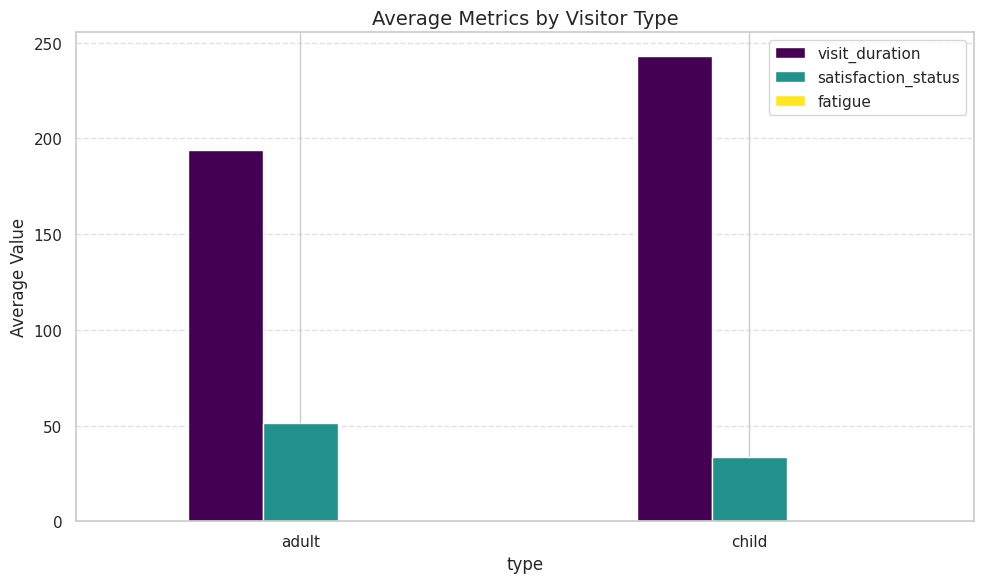

In [ ]:
# Compare average metrics by visitor type (e.g., child, adult, senior)
grouped_by_type = df.groupby('type')[['visit_duration', 'satisfaction_status', 'fatigue']].mean()

# Plot grouped bar chart
grouped_by_type.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average Metrics by Visitor Type", fontsize=14)
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Visitor Type Comparison

The chart displays average values for key metrics across two visitor categories: **adults** and **children**.

###  Key Observations:
- **Visit Duration**:  
  Children tend to stay in the park **longer** than adults, with an average visit duration noticeably higher. This could be attributed to a wider engagement with child-friendly attractions or longer family-oriented visits.

- **Satisfaction Status**:  
  Adults report a significantly **higher average satisfaction** than children. This suggests that the park's offerings may be better aligned with adult expectations or that children are more sensitive to wait times or fatigue.

- **Fatigue**:  
  Both groups show **low average fatigue**, but children exhibit slightly **less fatigue** than adults. This might be due to pacing differences or recovery time between attractions.

###  Conclusion:
While children stay longer in the park, their **lower satisfaction** levels highlight a potential area for improvement — perhaps through better queue entertainment, diversified child-centric experiences, or rest/fun zones. Adults, despite staying less, leave the park more satisfied, indicating successful service delivery for that segment.

## Ticket Type vs Satisfaction & Visit Duration

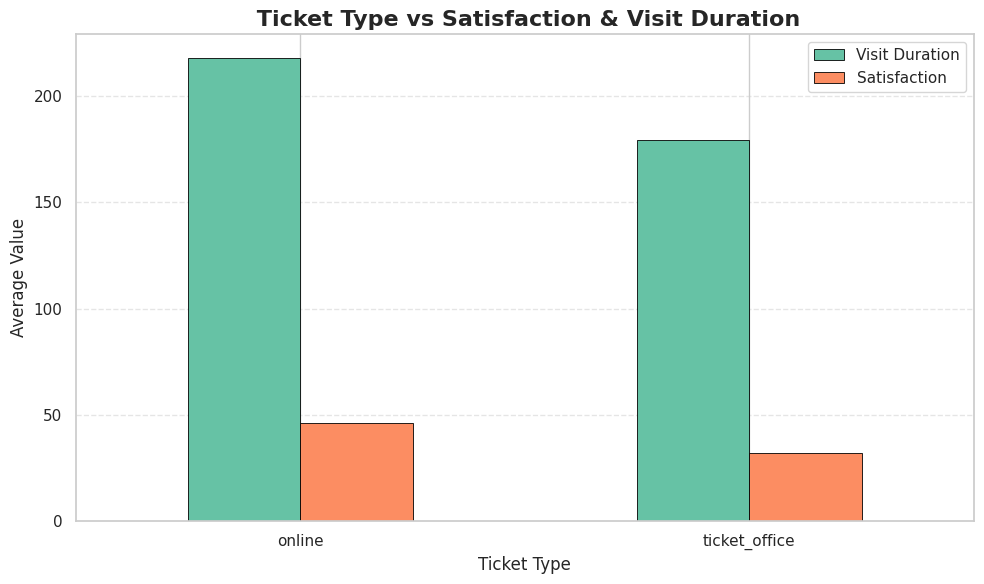

In [ ]:
# Set consistent Seaborn style and palette if not already done
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

# Group by ticket type and calculate means
grouped_by_ticket = df.groupby('ticket_type')[['visit_duration', 'satisfaction_status']].mean()

# Plot grouped bar chart
ax = grouped_by_ticket.plot(
    kind='bar',
    figsize=(10, 6),
    color=palette[:2],
    edgecolor='black',
    linewidth=0.6
)

# Title and styling
plt.title(" Ticket Type vs Satisfaction & Visit Duration", fontsize=16, fontweight='bold')
plt.ylabel("Average Value", fontsize=12)
plt.xlabel("Ticket Type", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(["Visit Duration", "Satisfaction"], loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()


##  Ticket Type Analysis – Impact on Visitor Experience

This chart compares the **average visit duration** and **satisfaction level** for two ticketing methods: **online** and **ticket office**.

###  Key Observations:

- **Visit Duration**:  
  Visitors who purchased tickets **online** tend to stay **longer** in the park on average compared to those who bought tickets at the **ticket office**. This may indicate that online ticket holders plan their visits more intentionally or arrive earlier due to faster access.

- **Satisfaction Level**:  
  The **satisfaction** is also higher for **online** ticket users. This suggests that the convenience and reduced entry friction of online purchase contributes positively to the overall park experience.

###  Conclusion:

The data highlights a clear benefit in promoting **online ticketing**:
- It correlates with **longer engagement** in the park.
- It is associated with **higher visitor satisfaction**.

Improving the digital experience and incentivizing online sales could further enhance operational flow and visitor sentiment.

## Visitor Clusters by Satisfaction and Visit Duration

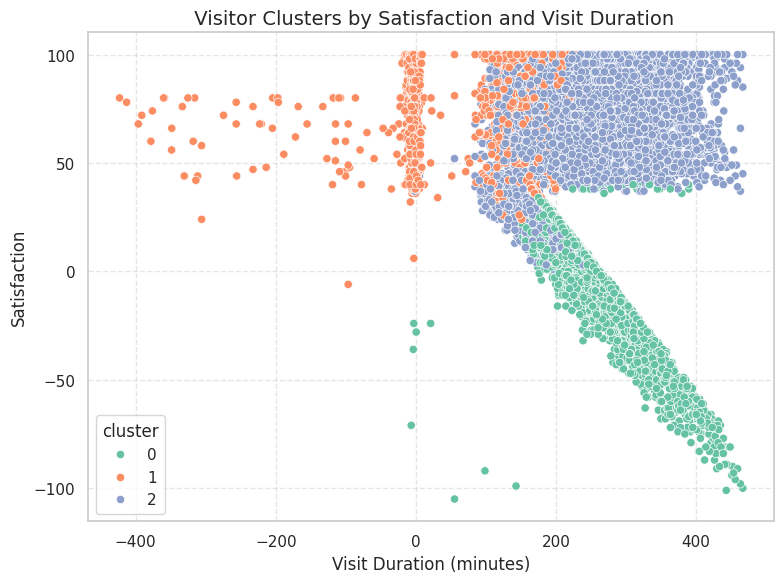

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select and normalize features for clustering
features = df[['visit_duration', 'wait_at_attraction', 'ride_duration', 'fatigue', 'satisfaction_status']].fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters: Satisfaction vs Visit Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='visit_duration',
    y='satisfaction_status',
    hue='cluster',
    palette='Set2'
)
plt.title(" Visitor Clusters by Satisfaction and Visit Duration", fontsize=14)
plt.xlabel("Visit Duration (minutes)")
plt.ylabel("Satisfaction")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  Behavioral Clustering of Visitors – Satisfaction vs Visit Duration

This scatterplot visualizes three clusters of visitors based on their behavior, using **K-Means clustering** applied to standardized features such as visit duration, wait time, fatigue, and satisfaction.

###  Cluster Interpretation:

- **Cluster 0 (orange)** – _Short visit, high satisfaction_:  
  These visitors generally stay for a short duration but report **high satisfaction**. They may represent casual guests or those who only target a few key attractions. Their quick, efficient visits leave a positive impression.

- **Cluster 1 (green)** – _Long visit, low satisfaction_:  
  This group stays **the longest** in the park, yet reports **low to very negative satisfaction levels**. Likely causes include long wait times, fatigue accumulation, or unmet expectations. This group is the most at risk in terms of experience quality.

- **Cluster 2 (blue)** – _Balanced experience_:  
  These visitors show **moderate to long durations** and **consistently high satisfaction**. They appear to represent the park's ideal user: engaged, satisfied, and not overwhelmed. Operationally, this cluster reflects a healthy visitor flow.

###  Observations:

- Negative values on the x and y axes indicate data inconsistencies (e.g., negative visit durations or satisfaction), suggesting the need for **data cleaning**.
- There’s a clear behavior pattern: **longer time spent doesn’t guarantee higher satisfaction**, particularly in Cluster 1.
- Clustering allows targeted strategy per group: streamline for Cluster 0, improve experience for Cluster 1, and maintain success for Cluster 2.

###  Recommendation:

- **Investigate the root causes** behind Cluster 1’s dissatisfaction — look into attraction capacity, wait times, and fatigue triggers.
- Promote behaviors and experiences similar to Cluster 2 through optimized visitor journey planning.
- Validate and clean anomalous data points (e.g., negative durations).



## Visitor Type

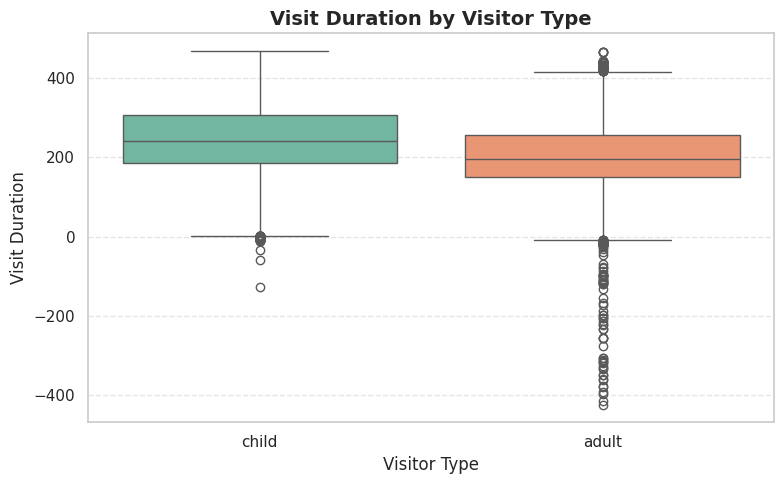

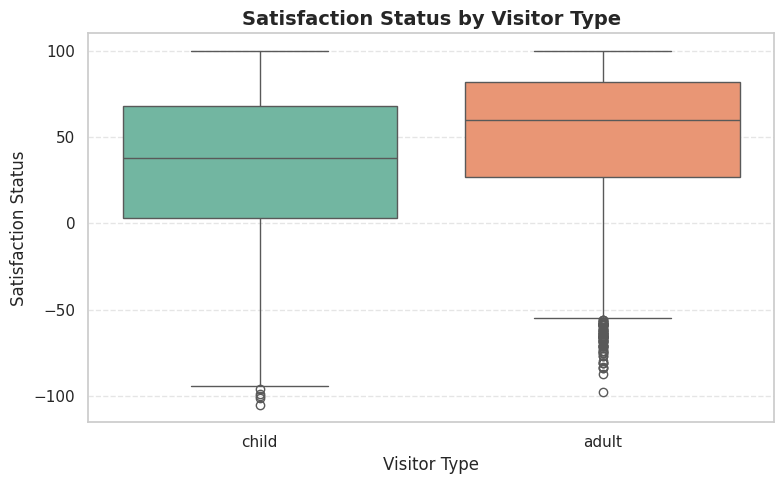

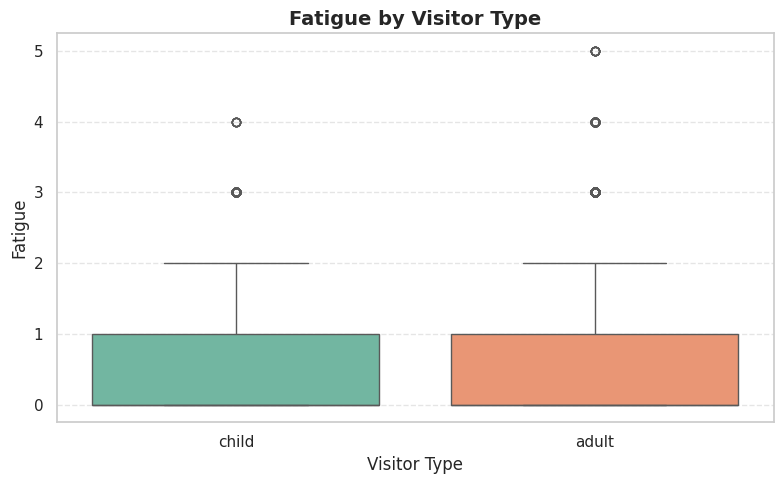

In [ ]:
# Define metrics to visualize
metrics = ['visit_duration', 'satisfaction_status', 'fatigue']

# Loop through metrics to create boxplots grouped by visitor type
for metric in metrics:
    plt.figure(figsize=(8, 5))

    # Set 'type' as both x-axis and hue to apply palette correctly (avoids warning)
    sns.boxplot(
        data=df,
        x='type',
        y=metric,
        hue='type',  # Needed to safely assign colors via palette
        palette="Set2",
        legend=False  # Hide redundant legend (x and hue are the same)
    )

    plt.title(f"{metric.replace('_', ' ').title()} by Visitor Type", fontsize=14, fontweight='bold')
    plt.xlabel("Visitor Type")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


##  Visitor Experience Metrics by Type

The boxplots below compare three key experience metrics between **children** and **adults**:  
`Visit Duration`, `Satisfaction Status`, and `Fatigue`.

---

###  Visit Duration
- **Children tend to stay longer in the park** than adults on average.
- The median duration for children is slightly higher, with a broader interquartile range (IQR), indicating more variability.
- Outliers with **extremely short or even negative durations** suggest data quality issues that should be addressed.

###  Satisfaction Status
- **Adults generally report higher satisfaction** levels compared to children.
- The distribution for children is wider, and the lower whiskers and outliers include many negative values, hinting at poor experiences in some cases.
- Children may be more sensitive to long waits, limited attractions, or fatigue, which could explain their lower scores.

###  Fatigue
- **Both groups show very low levels of fatigue**, with nearly identical distributions.
- The fatigue metric appears to be tightly bounded (likely due to modeling constraints), but a few higher outliers exist in both groups.
- This suggests that overall park pacing is well-balanced, though individual cases of high fatigue might warrant further study.

---

###  Conclusions:
- The park seems better optimized for **adults**, who show higher satisfaction in shorter visits.
- Children stay longer but report more dissatisfaction, which highlights opportunities to improve their experience (e.g., more engaging attractions, reduced wait times).
- Fatigue is not a major issue across the board, indicating successful pacing or availability of resting opportunities.

 **Recommendation:** Focus on improving the child visitor journey by personalizing attraction flow, enhancing interaction, and monitoring key dissatisfaction triggers.


## Wait Time at Attractions by Day of the Week

<ipython-input-10-78b76a160d30>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


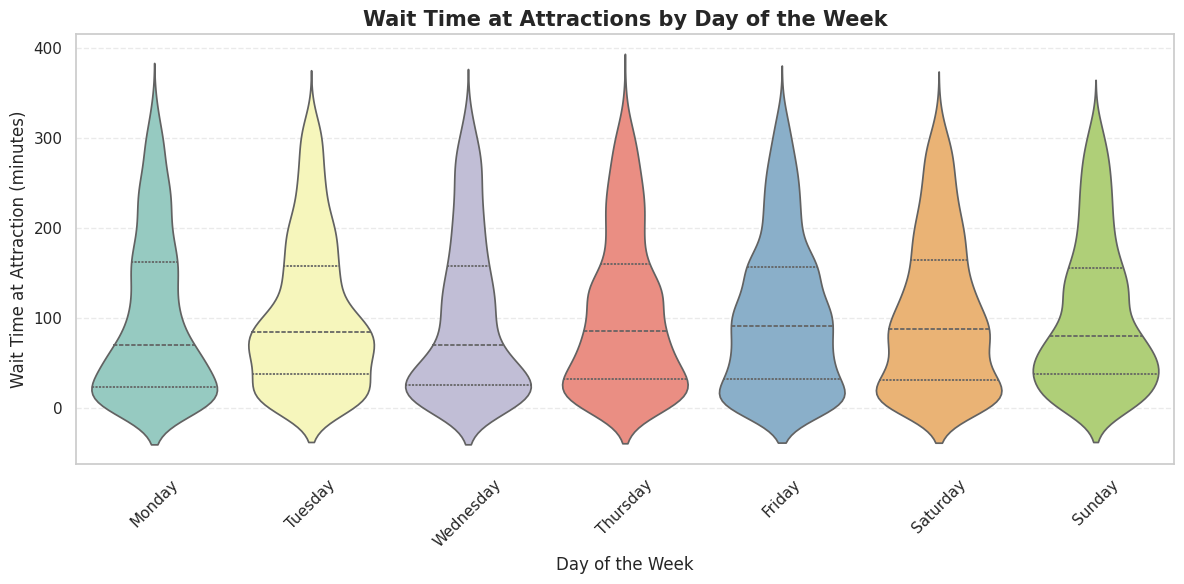

In [ ]:
# Create a violin plot to visualize wait time distribution across days of the week
# Violin plots combine a boxplot and a kernel density estimate, giving us both central tendency and distribution shape
plt.figure(figsize=(12, 6))  # Set figure size for better readability

# Plot the violin chart:
# - 'x' is the day of the week
# - 'y' is the wait time at attractions
# - 'palette' defines the color scheme
# - 'inner=quartile' adds boxplot lines inside the violin for median and IQR
sns.violinplot(
    data=df,
    x='day',
    y='wait_at_attraction',
    palette='Set3',
    inner='quartile'
)

# Add a clear, bold title and axis labels
plt.title("Wait Time at Attractions by Day of the Week", fontsize=15, fontweight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Wait Time at Attraction (minutes)")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add horizontal grid lines to improve readability of y-values
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adjust spacing to prevent label overlap
plt.tight_layout()

# Show the final plot
plt.show()

##  Analysis of Wait Times by Day of the Week

The violin plot provides a detailed look at how attraction wait times fluctuate throughout the week, highlighting both median values and overall distribution patterns.

### Key Insights:

- **Weekends (Saturday and Sunday)** show the highest variability in wait times. The broad spread of values, with many visitors waiting over 200 minutes, reflects heavy crowding and uneven flow management during peak periods.

- **Tuesday emerges as the most optimal day to visit**, with lower and more consistent wait times across the board. This suggests a significantly lighter visitor load and smoother operation of the park.

- **Monday and Wednesday** offer relatively balanced experiences — not as quiet as Tuesday, but far from the congestion of the weekend. Their compact distributions indicate efficient queue management and predictable throughput.

- **Thursday and Friday** display a visible increase in wait times, suggesting the buildup toward weekend-level activity begins earlier than might be assumed.

### Conclusion:

The weekly wait time patterns align with typical visitor behavior: lower attendance and shorter waits during weekdays, peaking over the weekend. These insights reinforce the importance of aligning operational planning and visitor guidance with day-specific trends. From an experience design perspective, the midweek period — especially Tuesday — presents an opportunity to deliver a consistently positive experience with minimal congestion, while weekends remain a challenge for flow management and resource allocation.
